In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import os

## 4.1

In [2]:
tcs = pd.read_csv('TCS.csv')
tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [3]:
tcs['14 Day Mean'] = tcs['Close Price'].rolling(14, min_periods=1).mean()
tcs['14 Day STD'] = tcs['Close Price'].rolling(14, min_periods=1).std()
tcs['Lower Band'] = tcs['14 Day Mean'] - (tcs['14 Day STD'] * 2)
tcs['Upper Band'] = tcs['14 Day Mean'] + (tcs['14 Day STD'] * 2)
tcs['Middle Band'] = (tcs['Upper Band']+tcs['Lower Band'])/2
tcs = tcs.fillna(0);
tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day Mean,14 Day STD,Lower Band,Upper Band,Middle Band
0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2365.100000,0.000000,0.000000,0.000000,0.000000
1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2397.125000,45.290189,2306.544621,2487.705379,2397.125000
2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2416.533333,46.428987,2323.675359,2509.391307,2416.533333
3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20,2446.450000,70.831690,2304.786620,2588.113380,2446.450000
4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94,2458.590000,67.080133,2324.429734,2592.750266,2458.590000


In [4]:
def label_race (tcs):
    if tcs['Close Price'] < tcs['Lower Band']:
        return 'Buy'
    if tcs['Close Price'] > tcs['Lower Band'] and tcs['Close Price'] < tcs['Middle Band']:
        return 'Hold Buy'
    if tcs['Close Price'] > tcs['Middle Band'] and tcs['Close Price'] < tcs['Upper Band']:
        return 'Hold Short'
    if tcs['Close Price'] > tcs['Upper Band']:
        return 'Short'
    return 'Other'

tcs['Call'] = tcs.apply(lambda tcs: label_race(tcs), axis=1)
tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day Mean,14 Day STD,Lower Band,Upper Band,Middle Band,Call
0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,...,2.138043e+09,30047,712450,78.39,2365.100000,0.000000,0.000000,0.000000,0.000000,Short
1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,...,4.339703e+09,58476,1167534,64.84,2397.125000,45.290189,2306.544621,2487.705379,2397.125000,Hold Short
2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,...,3.513729e+09,86412,1031752,71.74,2416.533333,46.428987,2323.675359,2509.391307,2416.533333,Hold Short
3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,...,6.489478e+09,111566,1135613,44.20,2446.450000,70.831690,2304.786620,2588.113380,2446.450000,Hold Short
4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,...,2.238430e+09,63112,517461,57.94,2458.590000,67.080133,2324.429734,2592.750266,2458.590000,Hold Short


In [5]:
train_X = tcs[['Upper Band','Lower Band','Middle Band','Close Price']]
train_Y = tcs['Call']
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_Y.ravel())
LR.predict(train_X) 
print("Logistic Regression")
round(LR.score(train_X,train_Y), 4)

Logistic Regression


0.9317

In [6]:
SVM = svm.LinearSVC()
SVM.fit(train_X, train_Y)
SVM.predict(train_X)
print("Support Vector Machines")
round(SVM.score(train_X,train_Y), 4)

Support Vector Machines


C:\Users\Dell\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5743

In [7]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

Random Forests


0.6526

In [8]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(train_X, train_Y)  
NN.predict(train_X)
print("Neural Networks")
round(NN.score(train_X, train_Y), 4)

Neural Networks


0.5542

In [9]:
maruti = pd.read_csv('MARUTI.csv')
maruti['14 Day Mean'] = maruti['Close Price'].rolling(14, min_periods=1).mean()
maruti['14 Day STD'] = maruti['Close Price'].rolling(14, min_periods=1).std()
maruti['Lower Band'] = maruti['14 Day Mean'] - (maruti['14 Day STD'] * 2)
maruti['Upper Band'] = maruti['14 Day Mean'] + (maruti['14 Day STD'] * 2)
maruti['Middle Band'] = (maruti['Upper Band']+maruti['Lower Band'])/2
maruti = maruti.fillna(0);
maruti.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day Mean,14 Day STD,Lower Band,Upper Band,Middle Band
0,MARUTI,EQ,15-May-2017,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01,6823.900000,0.000000,0.000000,0.000000,0.000000
1,MARUTI,EQ,16-May-2017,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97,6888.925000,91.959237,6705.006526,7072.843474,6888.925000
2,MARUTI,EQ,17-May-2017,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37,6912.016667,76.340853,6759.334961,7064.698373,6912.016667
3,MARUTI,EQ,18-May-2017,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44,6891.775000,74.324856,6743.125289,7040.424711,6891.775000
4,MARUTI,EQ,19-May-2017,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,6871.530000,78.692047,6714.145906,7028.914094,6871.530000


In [10]:
train_X = maruti[['Upper Band','Lower Band','Middle Band','Close Price']]
maruti['Call'] = LR.predict(train_X)
maruti.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day Mean,14 Day STD,Lower Band,Upper Band,Middle Band,Call
0,MARUTI,EQ,15-May-2017,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,...,2.286158e+09,31377,154743,46.01,6823.900000,0.000000,0.000000,0.000000,0.000000,Short
1,MARUTI,EQ,16-May-2017,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,...,4.884174e+09,49047,360641,50.97,6888.925000,91.959237,6705.006526,7072.843474,6888.925000,Hold Short
2,MARUTI,EQ,17-May-2017,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,...,3.087758e+09,65280,260033,58.37,6912.016667,76.340853,6759.334961,7064.698373,6912.016667,Hold Short
3,MARUTI,EQ,18-May-2017,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,...,2.794684e+09,37063,188907,46.44,6891.775000,74.324856,6743.125289,7040.424711,6891.775000,Hold Buy
4,MARUTI,EQ,19-May-2017,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,...,3.750475e+09,64293,234662,42.49,6871.530000,78.692047,6714.145906,7028.914094,6871.530000,Hold Buy


## 4.2

In [11]:
tcs = pd.read_csv('TCS.csv')
tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [12]:
tcs['%ch op_cl'] = ((tcs['Close Price']-tcs['Open Price'])/(tcs['Open Price']))*100
tcs['%ch lo_hi'] = ((tcs['High Price']-tcs['Low Price'])/(tcs['Low Price']))*100
tcs['%ch cp_mean'] = tcs['Close Price'].pct_change().rolling(5, min_periods=1).mean().fillna(0)
tcs['%ch cp_std'] = tcs['Close Price'].pct_change().rolling(5, min_periods=1).std().fillna(0)
tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%ch op_cl,%ch lo_hi,%ch cp_mean,%ch cp_std
0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,-0.421035,1.552357,0.000000,0.000000
1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2.065126,2.593271,0.027081,0.000000
2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,0.897884,1.557986,0.018933,0.011523
3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20,3.518367,5.312724,0.023598,0.011475
4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94,-1.145414,2.194288,0.014835,0.019873


In [13]:
arr = []
val = []
for value in tcs['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,497):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
tcs['Action'] = pd.DataFrame(val)
tcs = tcs.dropna()
tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%ch op_cl,%ch lo_hi,%ch cp_mean,%ch cp_std,Action
0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,-0.421035,1.552357,0.000000,0.000000,1.0
1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2.065126,2.593271,0.027081,0.000000,1.0
2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,0.897884,1.557986,0.018933,0.011523,1.0
3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20,3.518367,5.312724,0.023598,0.011475,-1.0
4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94,-1.145414,2.194288,0.014835,0.019873,1.0


In [14]:
train_X = tcs[['%ch op_cl','%ch lo_hi','%ch cp_mean','%ch cp_std']]
train_Y = tcs[['Action']]
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forests


0.6278

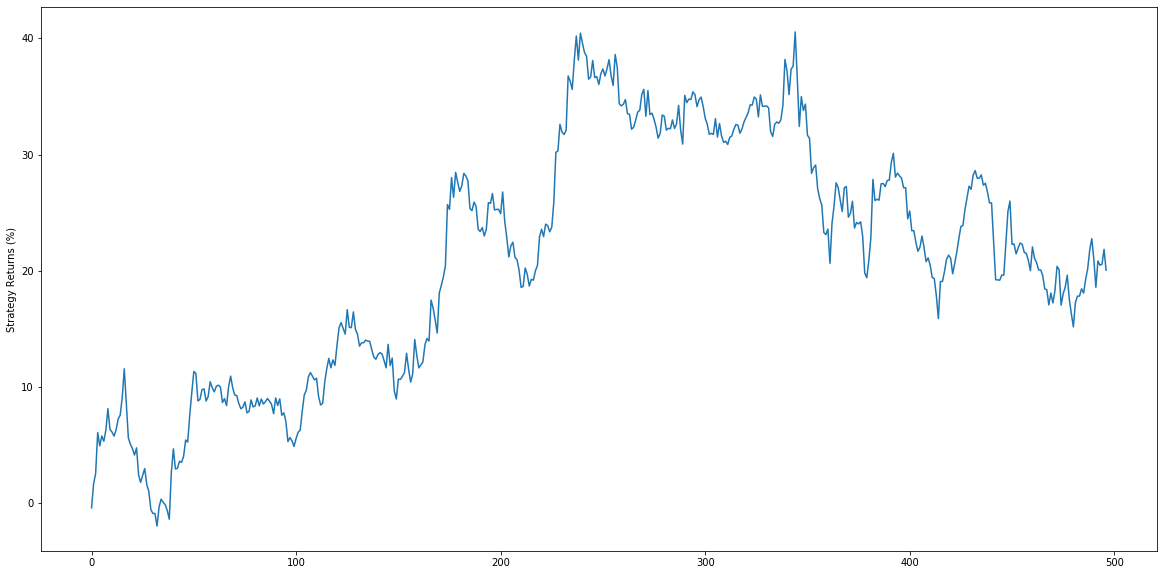

In [15]:
tcs['Net Cummulative Returns'] = (((tcs['Close Price'] - tcs['Open Price'])/(tcs['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.ylabel('Strategy Returns (%)')
plt.plot(tcs['Net Cummulative Returns']);